# Sobre o notebook

Aproveite esse espaço para as atividades do curso de **IA aplicada a Data Science: utilizando IA na construção de visualização de dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Este notebook foi construído com espaços para adicionar o prompt que será utilizado para criar o código pelo ChatGPT e as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.


Logo abaixo, temos as url's onde estão localizadas as bases utilizadas no projeto juntamente com a url com dados que utilizaremos também no desafio

In [1]:
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"
url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"
url_zoop_pay = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/cadastro_zoop_pay.csv"

## Aula 01 - Conhecendo os dados

### Mão na Massa - Zoop Pay

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Vamos atuar como analista de dados de um e-commerce. Recebemos três bases de dados com os dados dos clientes e vendas em 2023 e quais clientes estão pré-cadastrados na Zoop Pay, respectivamente.

Vamos iniciar unindo as duas primeiras bases do nosso projeto ("vendas" e "clientes") em um DataFrame chamado "df" utilizando como chave a coluna "ID_compra". Além disso, vamos organizar as colunas na seguinte sequência:

["ID_compra", "data", "horario", "categoria", "preco_unitario", "quantidade", "frete", "metodo_pagamento", "ID_cliente", "idade", "sexo_biologico", "cidade", "uf", "regiao", "cashback", "avaliacao_compra" ]

Construa um código para executar esta etapa usando o Python e a biblioteca Pandas.

In [2]:
import pandas as pd

# Exemplo de como carregar os DataFrames, caso necessário:
vendas = pd.read_csv(url_vendas)
clientes = pd.read_csv(url_clientes)

# Unindo as bases "vendas" e "clientes" usando a coluna "ID_compra" como chave
df = pd.merge(vendas, clientes, on="ID_compra")

# Organizando as colunas na sequência especificada
colunas_ordenadas = ["ID_compra", "data", "horario", "categoria", "preco_unitario", "quantidade", "frete", "metodo_pagamento", "ID_cliente", "idade", "sexo_biologico", "cidade", "uf", "regiao", "cashback", "avaliacao_compra" ]

df = df[colunas_ordenadas]

# Exibindo as primeiras linhas do DataFrame resultante para verificação
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9


> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

Agora, vamos unir o "df" com a base "zoop_pay", lida a partir da url "url_zoop_pay", gerando um novo "df". Para união das bases, utilizaremos a coluna "ID_cliente". Além disso, vamos ajustar a coluna "data" para o formato datetime, em que seu formato na base de dados está como "YYYY-MM-DD".

In [3]:
# Substitua url_zoop_pay pela URL real fornecida para a base zoop_pay
zoop_pay = pd.read_csv(url_zoop_pay)

# Unindo o DataFrame df com a base zoop_pay utilizando a coluna "ID_cliente"
df = pd.merge(df, zoop_pay, on="ID_cliente")

# Ajustando a coluna "data" para o formato datetime
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

# Exibindo as primeiras linhas do DataFrame resultante para verificação
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra,zoop_pay
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10,Não
1,2467,2023-08-02,17:10,Alimentos e bebidas,13.9,1,0.97,PIX,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,8,Não
2,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8,Sim
3,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7,Não
4,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9,Sim


## Aula 02 - Visualizando os dados

### Mão na Massa - Gerando visuais em relação a localidade

#### Desafio 1:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>


Temos um DataFrame chamado "df" e queremos construir um visual de gráfico de colunas que apresente o faturamento por região da Zoop.

Em "df", temos as colunas:

regiao: regiao do(a) cliente
preco_unitario: preço de uma unidade do produto
quantidade: quantidade vendida do produto
frete: frete a ser pago no total da compra.
Desejamos criar uma visualização que apresente o faturamento de cada região, em que o faturamento é dado pelo produto entre o preço unitário e a quantidade somadas ao frete.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

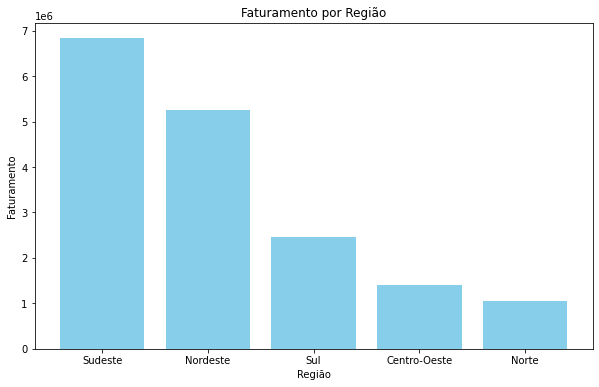

In [4]:
import matplotlib.pyplot as plt

# Supondo que df seja o seu DataFrame
# Calcula o faturamento para cada transação
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# Agrupa os dados por região e soma o faturamento
faturamento_por_regiao = df.groupby('regiao')['faturamento'].sum().reset_index()

# Ordena o resultado para melhor visualização
faturamento_por_regiao = faturamento_por_regiao.sort_values(by='faturamento', ascending=False)

# Criação do gráfico de colunas
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico
plt.bar(faturamento_por_regiao['regiao'], faturamento_por_regiao['faturamento'], color='skyblue')  # Plota o gráfico de barras
plt.title('Faturamento por Região')  # Adiciona título ao gráfico
plt.xlabel('Região')  # Adiciona rótulo ao eixo X
plt.ylabel('Faturamento')  # Adiciona rótulo ao eixo Y
plt.show()  # Exibe o gráfico

#### Desafio 2:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>


Temos um DataFrame chamado "df" e queremos construir um visual de colunas empilhadas que apresente a quantidade de pessoas por sexo biológico em relação aos estados de "São Paulo" e "Rio de Janeiro".

Em "df", temos as colunas:

uf: unidade federativa (estado) do(a) cliente. Vamos utilizar apenas os estados de "São Paulo" e "Rio de Janeiro"
sexo_biologico: sexo biológico do(a) cliente
Desejamos criar uma visualização que apresente a quantidade de pessoas agrupadas por sexo biológico nos estados que definimos.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

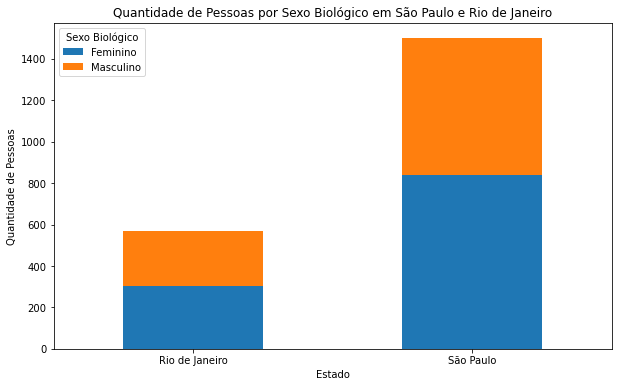

In [5]:
# Filtrar o DataFrame para incluir apenas os estados de "São Paulo" e "Rio de Janeiro"
df_filtrado = df[df['uf'].isin(['São Paulo', 'Rio de Janeiro'])]

# Contar a quantidade de pessoas por sexo biológico e estado
contagem_por_sexo_e_estado = df_filtrado.groupby(['uf', 'sexo_biologico']).size().unstack(fill_value=0)

# Criar o gráfico de colunas empilhadas
contagem_por_sexo_e_estado.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Pessoas por Sexo Biológico em São Paulo e Rio de Janeiro')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Pessoas')
plt.xticks(rotation=0)  # Mantém os rótulos dos estados na horizontal para melhor legibilidade

# Mostrar a legenda e o gráfico
plt.legend(title='Sexo Biológico')
plt.show()

## Aula 03 - Gerando mais visuais

### Mão na Massa - Perfil dos clientes

#### Desafio 1:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Agora que temos os dados carregados, podemos ver que cada arquivo possui as seguintes informações:

cadastro_zoop_pay.csv:

* ID_cliente: Identificação do cliente
zoop_pay: Indica se o cliente está pré-cadastrado no Zoop Pay ("Sim" ou "Não")
zoop_clientes.csv e zoop_vendas.csv contêm informações adicionais sobre compras e detalhes dos clientes, mas não são necessárias para o desafio atual.

Em seguida, vamos criar um gráfico que mostre a proporção de clientes pré-cadastrados no Zoop Pay. Vamos contar quantos clientes estão pré-cadastrados ("Sim") versus quantos não estão ("Não"). Assim:

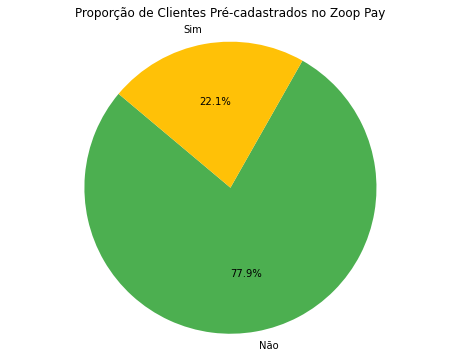

In [6]:
# Carregar o DataFrame
cadastro_zoop_pay = pd.read_csv(url_zoop_pay)

# Contagem de clientes pré-cadastrados no Zoop Pay
zoop_pay_counts = cadastro_zoop_pay['zoop_pay'].value_counts()

# Criando o gráfico de pizza para mostrar a proporção
plt.figure(figsize=(8, 6))
plt.pie(zoop_pay_counts, labels=zoop_pay_counts.index, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FFC107'])
plt.title('Proporção de Clientes Pré-cadastrados no Zoop Pay')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Desafio 2:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

O gráfico a seguir apresenta a distribuição das idades dos clientes da Zoop por região. Este tipo de visual é útil para entender as variações e tendências da idade dos clientes em diferentes partes do país, ajudando a empresa a definir personas ou perfis de cliente para estratégias de marketing e produtos regionalizados.

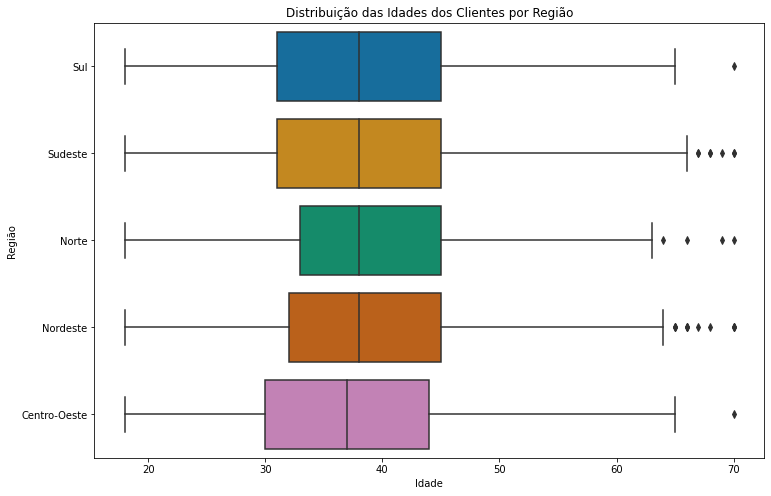

In [8]:
import seaborn as sns

# Criação do boxplot
plt.figure(figsize=(12, 8))  # Define o tamanho do gráfico
boxplot = sns.boxplot(x='idade', y='regiao', data=df, palette="colorblind")  # Cria o boxplot

# Adiciona títulos e rótulos aos eixos
plt.title('Distribuição das Idades dos Clientes por Região')  # Título do gráfico
plt.xlabel('Idade')  # Rótulo do eixo X
plt.ylabel('Região')  # Rótulo do eixo Y

# Exibe o gráfico
plt.show()

Este gráfico de caixa (boxplot) fornece uma visão clara das medianas, quartis e possíveis outliers nas idades dos clientes em cada região, o que pode ajudar a Zoop a afinar suas campanhas e produtos para cada mercado específico.


## Aula 04 - Técnicas de storytelling

### Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua própria.

In [9]:
# Adicionando as cores como variáveis do projeto
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

### Mão na Massa - Refinando os visuais escolhidos

#### Desafio 1:

##### Gráfico sem refinamento

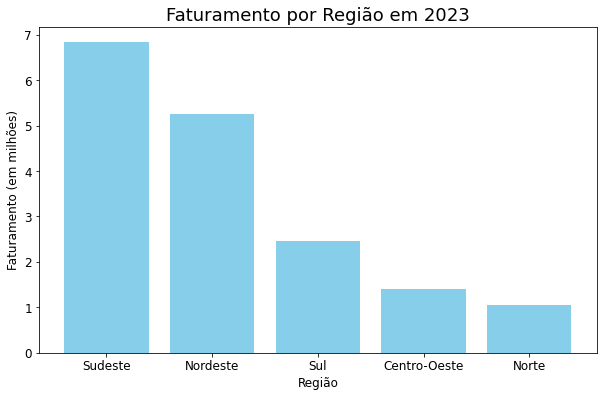

In [10]:
# Criando o gráfico de barras simples
plt.figure(figsize=(10, 6))
bars = plt.bar(faturamento_por_regiao['regiao'], faturamento_por_regiao['faturamento']/1e6, color='skyblue')

# Configurando cores e estilos do gráfico
plt.title('Faturamento por Região em 2023', fontsize=18)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Faturamento (em milhões)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar o gráfico
plt.show()

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Precisamos desenvolver um gráfico de barras para apresentar o faturamento por região em 2023, usando o DataFrame chamado 'faturamento_por_regiao'. As colunas relevantes são "regiao", que contém as regiões, e "faturamento", que contém os valores de faturamento para cada região, como mostrado neste caderno anteriormente. Precisamos de um gráfico visualmente refinado com as seguintes especificações:

Plano de fundo da figura e da área do plot na cor CINZA_1; cor das colunas em AQUA_1 (caso queira destacar apenas uma, pode recorrer ao AQUA_3, por exemplo; tamanho da figura de (10,6); altere o título da figura e seu tamanho para 18 e cor CINZA_5, ajuste os labels e rótulos do eixo x e y quando existirem para tamanho 12 e cor AZUL_1; retire o máximo das bordas possível e ajuste os dados para serem apresentados nas barras na ordem de milhões na cor AZUL_1 e tamanho 12; configuração do tamanho: Ajuste o tamanho da figura para (10, 6) para garantir que o gráfico seja grande o suficiente para uma visualização clara. Cores: use a cor AQUA_1 para todas as colunas do gráfico. No entanto, destaque a coluna com o maior faturamento usando a cor AQUA_3. Fundo do Gráfico: defina a cor de fundo da área do plot e da figura para CINZA_1 para um design mais suave e profissional. Título e Rótulos: Configure o título para 'Faturamento por Região em 2023' com tamanho de fonte 18 e cor CINZA_5. Os rótulos dos eixos devem ser 'Região' para o eixo X e 'Faturamento (milhões)' para o eixo Y, ambos com tamanho de fonte 12 e cor AZUL_1. Configurações dos Eixos: Ajuste o tamanho das fontes dos ticks do eixo X para 12 e cor AZUL_1, e remova completamente os ticks do eixo Y para simplificar o visual. Bordas: Remova todas as bordas desnecessárias do gráfico, exceto a borda inferior, que deve ser colorida em AZUL_1. Valores das Barras: Adicione o valor do faturamento acima de cada barra, convertendo os valores para milhões e formatando-os para uma casa decimal. Esses valores devem ser exibidos na cor AZUL_1 e com tamanho de fonte 12. Utilize as bibliotecas de visualização de dados do Python para criar essa visualização e assegure-se de que o gráfico seja informativo e atraente visualmente.


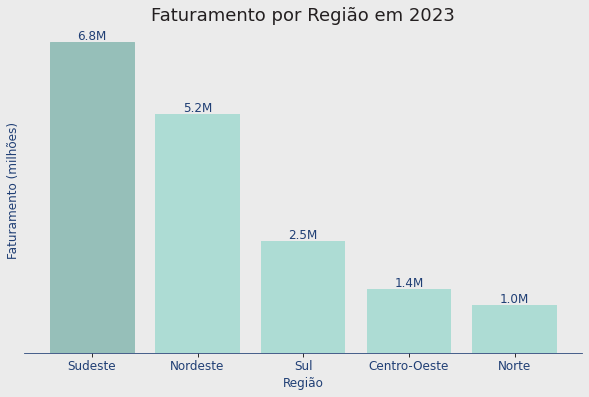

In [12]:
# Configuração do gráfico refinado
plt.figure(figsize=(10, 6))
bars = plt.bar(faturamento_por_regiao['regiao'], faturamento_por_regiao['faturamento'], color=AQUA_1)

# Destacando a barra com maior faturamento
max_value = faturamento_por_regiao['faturamento'].max()
for bar in bars:
    if bar.get_height() == max_value:
        bar.set_color(AQUA_3)

# Configurações adicionais do gráfico
plt.gca().set_facecolor(CINZA_1)
plt.gcf().set_facecolor(CINZA_1)
plt.title('Faturamento por Região em 2023', fontsize=18, color=CINZA_5)
plt.xlabel('Região', fontsize=12, color=AZUL_1)
plt.ylabel('Faturamento (milhões)', fontsize=12, color=AZUL_1)
plt.xticks(fontsize=12, color=AZUL_1)
plt.yticks([])  # Remover os rótulos do eixo y

# Removendo bordas desnecessárias
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_color(AZUL_1)

# Adicionando valores sobre as barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height() / 1e6:.1f}M', ha='center', va='bottom', color=AZUL_1, fontsize=12)

# Mostrar o gráfico
plt.show()

#### Desafio 2:

##### Gráfico sem refinamento

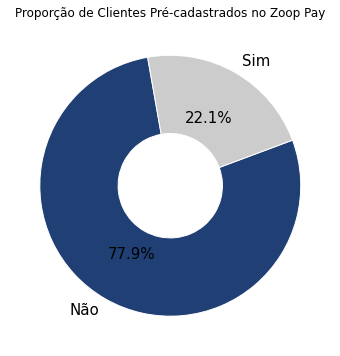

In [13]:
# Carregamento do DataFrame
url_zoop_pay = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/cadastro_zoop_pay.csv"
cadastro_zoop_pay = pd.read_csv(url_zoop_pay)

# Contagem de clientes pré-cadastrados no Zoop Pay
zoop_pay_counts = cadastro_zoop_pay['zoop_pay'].value_counts()

# Criando o gráfico de rosca de forma mais simples
plt.figure(figsize=(6, 6))
plt.pie(zoop_pay_counts, labels=zoop_pay_counts.index, autopct='%1.1f%%', startangle=100,
        colors=['#203f75', '#cccccc'],  # Cores simplificadas sem uso de variáveis
        wedgeprops=dict(width=0.6, edgecolor='w'),
        textprops={'fontsize': 15})

# Título simples sem customização de cor e fonte
plt.title('Proporção de Clientes Pré-cadastrados no Zoop Pay')

# Mostrar o gráfico
plt.show()

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Precisamos desenvolver um gráfico de rosca para visualizar a proporção de clientes pré-cadastrados no serviço Zoop Pay. Utilize o arquivo cadastro_zoop_pay.csv para carregar os dados, que incluem uma coluna zoop_pay com valores 'Sim' e 'Não' indicando o status de pré-cadastro dos clientes.

Especificações do Gráfico:

Carregamento dos Dados: Carregue os dados do arquivo CSV disponível no seguinte URL (substitua pelo URL real): "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/cadastro_zoop_pay.csv". Conte a quantidade de clientes para cada categoria ('Sim' e 'Não') na coluna zoop_pay.

Estilo Visual:

Tamanho da Figura: Ajuste o tamanho da figura para (6x6) para facilitar a visualização. Plano de Fundo: Configure o plano de fundo da figura e da área do plot na cor CINZA_1. Cores das Fatias: Utilize a cor AZUL_1 para a fatia que representa 'Sim' e CINZA_3 para 'Não'. Texto e Porcentagens: Os rótulos das fatias devem estar na mesma cor das fatias e com tamanho de fonte 12. As porcentagens devem ser exibidas em negrito, cor BRANCO, e também com tamanho de fonte 12. Posição das Porcentagens: Ajuste as porcentagens para que apareçam na posição 0.8 em relação ao centro da rosca. Configurações Adicionais:

Largura da Rosca: Defina a largura da rosca para 0.4 para melhor distinção visual. Título: Adicione um título 'Proporção de Clientes Pré-cadastrados no Zoop Pay', com tamanho de fonte 18 e cor CINZA_5. Bordas: Evite explosões de fatias e remova bordas desnecessárias para simplificar o visual. Objetivo: O objetivo é criar uma visualização informativa e atraente que permita identificar rapidamente a proporção de clientes pré-cadastrados no Zoop Pay. Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

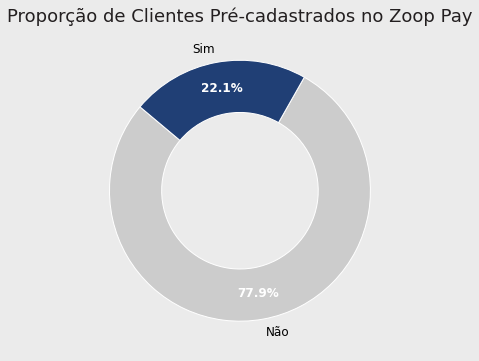

In [14]:
# Suponha que este código seja executado onde 'cadastro_zoop_pay.csv' está acessível
url_zoop_pay = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/cadastro_zoop_pay.csv"
cadastro_zoop_pay = pd.read_csv(url_zoop_pay)

# Contagem de clientes pré-cadastrados no Zoop Pay
zoop_pay_counts = cadastro_zoop_pay['zoop_pay'].value_counts()

# Criando o gráfico de rosca
plt.figure(figsize=(6, 6), facecolor=CINZA_1)
wedges, texts, autotexts = plt.pie(zoop_pay_counts, labels=zoop_pay_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.8,
                                   colors=[AZUL_1 if label == 'Sim' else CINZA_3 for label in zoop_pay_counts.index],
                                   wedgeprops=dict(width=0.4, edgecolor='w'))

# Configurações adicionais do gráfico
plt.title('Proporção de Clientes Pré-cadastrados no Zoop Pay', fontsize=18, color=CINZA_5)

# Ajustando os rótulos e as porcentagens
for text, autotext in zip(texts, autotexts):
    text.set_color(autotext.get_color())  # Rótulos das fatias na mesma cor das fatias
    text.set_fontsize(12)
    autotext.set_fontsize(12)  # Tamanho dos textos de porcentagem
    autotext.set_fontweight('bold')  # Negrito para as porcentagens
    autotext.set_color(BRANCO)  # Cor das porcentagens

# Mostrar o gráfico
plt.show()